In [1]:
%matplotlib inline

# Modelagem Matemática em Ciências Computacionais e Engenharias

**Prof. Dr. Gustavo Oliveira, gustavo.oliveira@ci.ufpb.br** 


## O que é um modelo matemático 

Um modelo matemático pode ser definido, de forma geral, como uma formulação ou equação que expressa as características essenciais de um sistema ou processo físico em termos matemáticos. A fórmula pode variar de uma simples relação algébrica a um conjunto grande e complicado de equações diferenciais. 

Por exemplo, com base em suas observações, Newton formulou sua segunda lei do movimento. Se escrevermos a taxa de variação temporal da velocidade pela derivada $\frac{dv}{dt}$ (em $m/s)$, um modelo matemático que obtemos para a segunda lei de Newton é

$$\dfrac{dv}{dt} = \dfrac{F}{m},$$

onde $F$ é a força resultante (em $N$) agindo sobre o corpo e $m$ a massa (em $kg$).

Este modelo matemático, assim como vários outros, possui as seguintes características:

- descrevem um processo ou sistema natural em termos matemáticos;

- representam uma idealização (simplificação) da realidade. Isto é, o modelo ignora alguns "detalhes" do processo natural e se concentra em suas manifestações essenciais;
 
- produzem resultados que podem ser reproduzidos e usados para propósitos de previsão. Por exemplo, se a força sobre um corpo e a sua massa forem conhecidas, o modelo pode ser usado para estimar a aceleração $a=\frac{dv}{dt}$ do corpo.

Consideremos um paraquedista em queda livre. Durante seu movimento, duas forças principais atuam sobre ele. A força gravitacional $F_G$, com sentido para baixo, e a força da resistência do ar (arrasto) $F_D$, em sentido oposto. Se o sentido positivo for conferido à força gravitacional, podemos modelar a força resultante como

$$F = F_G - F_D = mg - cv$$, 

onde $g$ é a constante gravitacional e $c$ o _coeficiente de arrasto_, medido em $kg/s$. Vale ressaltar que ao assumirmos $F_D = cv$, estamos dizendo que a força de arrasto é linearmente proporcional à velocidade. Entretanto, na realidade, esta relação é não-linear. 

Dessa maneira, podemos chegar a um modelo mais completo substituindo a força resultante assim obtendo:

$$\dfrac{dv}{dt} = \dfrac{mg - cv}{m} = g - \dfrac{c}{m}v.$$

Esta _equação diferencial ordinária_ (EDO) possui uma solução geral que pode ser encontrada por técnicas analíticas. Uma solução particular para esta EDO é obtida ao impormos uma _condição inicial_. Visto que o paraquedista está em repouso antes da queda, temos que $v=0$ quando $t=0$. Usando esta informação, concluímos que o perfil de velocidade é dado por

$$v(t) = \dfrac{gm}{c}(1 - e^{-(c/m)t}).$$

Como veremos adiante em um estado de caso real apresentado por Yan Ferreira, esta função cresce exponencialmente até atingir uma estabilização na _velocidade terminal_.

## O salto de paraquedas de Yan e Celso 

Como exemplo, veremos a análise do salto de paraquedas de Yan com seu irmão Celso. Vamos calcular a aceleração que seria atingida por Yan desde o salto até o momento da abertura de seu paraquedas. Na época do salto, Yan estava com 65 kg e o ar apresentava um coeficiente de arrasto estimado em 12,5 kg/s.

Utilizando a fórmula dada, podemos calcular a velocidade atingida por Yan em relação ao tempo. A seguir, criamos uma função para calcular $v(t)$ nos 10 primeiros segundos do salto, que foi o tempo que Yan permaneceu em queda até a abertura do paraquedas.

0.0000 m/s
8.9153 m/s
16.2709 m/s
22.3397 m/s
27.3467 m/s
31.4778 m/s
34.8861 m/s
37.6982 m/s
40.0183 m/s
41.9325 m/s
43.5119 m/s
==> Abertura do paraquedas.


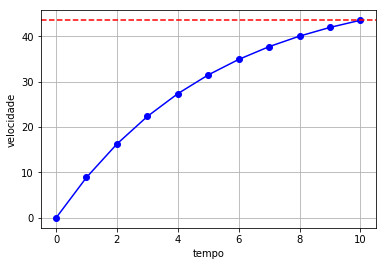

In [2]:
# velocidade no salto de Yan
import numpy as np
import matplotlib.pyplot as plt


arr_yan = 11*[0]
contador = 0
while (contador <= 10):
    a = ((9.8 * 65)/12.5)*(1 - np.exp(-(12.5/65)*contador))   
    arr_yan[contador] = a
    print("{0:.4f} m/s".format(a))
    contador += 1
else:
    print('==> Abertura do paraquedas.')
    
plt.plot(arr_yan,'o-b')
plt.xlabel('tempo')
plt.ylabel('velocidade')
plt.grid()
plt.axhline(a,color='r',ls='--')
plt.show()

Porém, Celso, irmão de Yan, também saltou com ele, em separado. Celso, tem mais 20kg a mais do que Yan. Então, vamos ver como a massa influenciou a velocidade no salto de Celso e comparas as curvas.

0.0000 m/s
9.1135 m/s
16.9806 m/s
23.7719 m/s
29.6344 m/s
34.6952 m/s
39.0638 m/s
42.8351 m/s
46.0905 m/s
48.9008 m/s
51.3268 m/s
==> Abertura do paraquedas


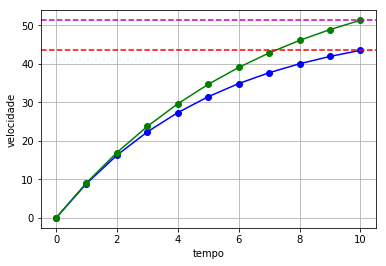

In [3]:
# velocidade no salto de Yan


from math import exp
import matplotlib.pyplot as plt

arr_celso = arr_yan[:]
contador = 0
while (contador <= 10):       
    b = ((9.8 * 85)/12.5)*(1- exp(-(12.5/85)*contador))   
    arr_celso[contador] = b
    print("{0:.4f} m/s".format(b))
    contador += 1
else:
    print('==> Abertura do paraquedas')
    
plt.plot(arr_yan,'o-b')
plt.plot(arr_celso,'o-g')
plt.xlabel('tempo')
plt.ylabel('velocidade')
plt.grid()
plt.axhline(a,color='r',ls='--')
plt.axhline(b,color='m',ls='--')
plt.show()

Podemos observar que quanto maior a massa, maior é a velocidade atingida. Por esta razão, Celso chegou ao solo antes de Yan.

Este breve exemplo nos mostra a implementação de um modelo matemático em Python, onde utilizamos partes de programação_ estruturada_ e _modular_. Estruturada, no sentido das instruções e modular no sentido de que aproveitamos os pacotes (ou **módulos**) _math_ e _numpy_ para invocarmos a função exponencial `exp` e os as funções para plotagens gráficas.

### Deslocamento até a abertura do paraquedas

Sabemos da Física e do Cálculo que o deslocamento é a integral da velocidade com relação ao tempo. Portanto, se $D_Y$ e $D_C$ foram os deslocamentos de Yan e Celso em seus saltos, podemo usar a integral:

$$D = \int_0^{10} v(t) \, dt,$$

em cada caso para computar esses deslocamentos. No Python, podemos fazer isso com o código abaixo (que você entenderá mais tarde como fazer).

In [4]:
import sympy as sy

t,g,m,c = sy.symbols('t g m c')
v = g*m/c*(1 - sy.exp(-c/m*t))
s1 = sy.integrate(v,(t,0,10)).subs({'m':65.0,'g':9.8,'c':12.5})
s2 = sy.integrate(v,(t,0,10)).subs({'m':85.0,'g':9.8,'c':12.5})
print("Yan voou incríveis DY = {0:.2f} metros em 10 segundos!".format(s1))
print("Celso voou incríveis DC = {0:.2f} metros em 10 segundos!".format(s2))

Yan voou incríveis DY = 283.34 metros em 10 segundos!
Celso voou incríveis DC = 317.38 metros em 10 segundos!


## Programação estruturada e modular


#### Prgramação estruturada

A idéia central por trás da programação estruturada é que qualquer algoritmo numérico pode ser composto de três estruturas de controle fundamentais: _sequencia_, _seleção_ e _repetição_.

Nos primórdios da computação, os programadores usualmente não prestavam muita atenção ao fato de o programa ser claro e fácil de entender. Hoje, é reconhecido que existem muitos benefícios em escrever um código bem organizado e bem estruturado. Além do benefício óbvio de tornar o software mais fácil de ser compartilhado, isso também ajuda a garantir um desenvolvimento de programa mais eficiente.

Portanto, algoritmos bem estruturados são, invariavelmente, fáceis de corrigir e testar, resultando em programas que têm um tempo de desenvolvimento e atualização menor. Embora a programação estruturada seja flexível o suficiente para permitir criatividade e expressões pessoais, suas regras impõem restrições suficientes para garantir um código final de mais qualidade, mais limpo e mais elegante, quando comparada à versão não estruturada.

#### Programação modular 

Na programação modular, a idéia é que cada módulo desenvolva uma tarefa específica e tenha um único ponto de entrada e um único ponto de saída, de modo que o desenvolvedor possa reutilizá-lo invariavelmente em várias aplicações. 

Dividir tarefas ou objetivos em partes mais simples é uma maneira de torná-los mais fáceis de tratar. Pensando dessa maneira, os programadores começaram a dividir grandes problemas em subproblemas menores, ou **módulos**, que podem ser desenvolvidos de forma separada e até mesmo por pessoas diferentes, sem que isso interfira no resultado final.

Hoje em dia, todas as linguagens de programação modernas, tais como C++, Java, Javascript e a própria Python utilizam módulos (também conhecidos como _pacotes_ ou _bibliotecas_). Algumas características diferenciais da programação modular são a manutençao facilitada e a reusabilidade do código em programas posteriores.

Abaixo, mostramos um exemplo avançado de como criar um módulo em Python para lidar com pontos na Geometria Plana. 
Nosso módulo poderia ser salvo em um arquivo chamado `ponto.py`, por exemplo e utilizado em programas próprios que viermos a desenvolver. Neste exemplo, a _classe_ `Ponto` possui funções para realizar as seguintes operações: 

- criar um novo ponto;

- calcular a distância Euclidiana entre dois pontos;

- calcular a área de um triângulo pela fórmula de Heron e 

- imprimir o valor da área de um triângulo.


In [3]:
"""
Módulo: ponto.py
Exemplo de programação modular. 
Classe para trabalhar com pontos do espaço 2D.
"""

import numpy as np 
import matplotlib.pyplot as plt

class Ponto:

    # inicialização de um ponto arbitrário com coordenadas (xp,yp)
    def __init__(self, xp, yp):
        self.x = xp
        self.y = yp

    # fórmula da distância entre dois pontos
    def dist(P1,P2):                                        
        return ( (P2.x - P1.x)**2 + (P2.y - P1.y)**2 )**0.5
    
    # área de um triângulo ABC pela fórmula de Heron 
    def area_heron(P1,P2,P3):
                
        a = Ponto.dist(P1,P2)  # comprimento |AB|
        b = Ponto.dist(P2,P3)  # comprimento |BC|
        c = Ponto.dist(P3,P1)  # comprimento |CA|
        
        p = 0.5*(a + b + c)  # semiperímetro 
        
        A = ( p*(p - a)*(p - b)*(p - c) )**0.5  # área
        
        return A
    
    def imprime_area_triangulo(P1,P2,P3):
        
        txt = 'Area do triângulo P1 = ({0}.{1}); P2 = ({2}.{3}); P3 = ({4}.{5}) :: A = {6}'        
        area = Ponto.area_heron(P1,P2,P3)
        
        print(txt.format(P1.x,P1.y,P2.x,P2.y,P3.x,P3.y,area))
    

### Exemplo: usando a classe `ponto.py` para calcular a área de um triângulo retângulo

In [4]:
# Cálculo da área para o triângulo 
# P1 = (0,0);  P2 = (1,0);  P3 = (0,1)

P1 = Ponto(0.0,0.0)
P2 = Ponto(1.0,0.0)
P3 = Ponto(0.0,1.0)
Ponto.imprime_area_triangulo(P1,P2,P3)

Area do triângulo P1 = (0.0.0.0); P2 = (1.0.0.0); P3 = (0.0.1.0) :: A = 0.49999999999999983


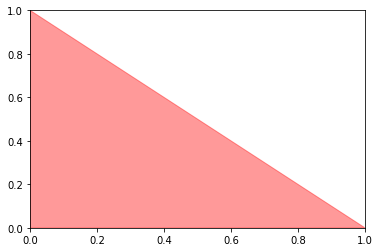

In [5]:
# plotagem do triângulo
P = np.array([[P1.x,P1.y],[P2.x,P2.y],[P3.x,P3.y]])
plt.figure()
pol = plt.Polygon(P,color='red',alpha=0.4)
plt.gca().add_patch(pol)

### Exemplo: usando a classe `ponto.py` para calcular a área de um triângulo qualquer

Area do triângulo P1 = (4.0.2.0); P2 = (1.5.1.5); P3 = (2.0.-3.0) :: A = 5.75


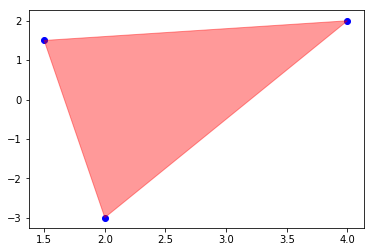

In [10]:
# Cálculo da área para o triângulo 
# P1 = (4,2);  P2 = (3,2);  P3 = (2,-3)

P4 = Ponto(4.0,2.0)
P5 = Ponto(1.5,1.5)
P6 = Ponto(2.0,-3.0)
Ponto.imprime_area_triangulo(P4,P5,P6)

plt.figure()
plt.scatter(P4.x,P4.y,color='blue')
plt.scatter(P5.x,P5.y,color='blue')
plt.scatter(P6.x,P6.y,color='blue')

Px = [P4.x,P5.x,P6.x]
Py = [P4.y,P5.y,P6.y]
plt.fill(Px,Py,color='red',alpha=0.4)